In [49]:
#importing all the packages The is recomended in the pdf, and additional that I used.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from wordcloud import WordCloud
from scipy import stats
import io


In [2]:
from google.colab import files # uploaded the AB_NYC_2019 csv file 
uploaded = files.upload()

Saving AB_NYC_2019.csv to AB_NYC_2019.csv


In [90]:
OrginalFile = pd.read_csv('AB_NYC_2019.csv')# Reads the file 
print(OrginalFile)# the file has 48895 rows x 16 columns

             id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_grou

In [94]:
#######################################   Part1     ##################################################
# I think the best way to remove outliers will be using z score after doing research, It seems removing outliers of each neighborhood seems the better choice 
# Rather then removing outliers of the whole data because some boroughs can be more expensive then others.
# Rather then doing boroughs, I took z score of each neighbourhood, because in every boroughs, there are very rich areas and poor area. so this will be the best option

### first I am  going to drop any listing with price 0 because it seems to be an error and there are only few listings.
uncleanData = pd.read_csv('AB_NYC_2019.csv') # reading the file again 
sorted = uncleanData.sort_values(by='price', ascending=True) # Sorting the file by thier price
uncleanData_1 = sorted.drop(sorted[sorted['price'] < 1].index)# if the price is less than one then we dropping the row
def calcZscore(x):#created function that can be called 
    return np.abs(stats.zscore(x))#calculates the z score

# calculate the z-scores for each group
uncleanData_1['Zscore'] = uncleanData_1.groupby('neighbourhood')['price'].transform(calcZscore)# made a column of Zscores by grouping neighborhood 
#with thier prize and using the formula to calculate scroes.
Part1CleanData = uncleanData_1[uncleanData_1['Zscore'] <= 3].copy()# as mentioned in textbook if the z degree is 3 or higher remove it because it is a outlier. 
#so in this case we copy rows that have z score less then 3 to the new file
Part1CleanData.to_csv("new_clean_data.csv", index=False)# making a new excel file




In [95]:
CleanData = pd.read_csv('new_clean_data.csv')# Reads the file 
print(CleanData)# the clean file has [48301 rows x 17 columns] 
#one more column created for z score
# 583 rows were removed because they were a outlier for thier neighborhood. 594 rows seem very reasonable bacause there are total of 48895 rows

             id                                              name    host_id  \
0      18490141                           IT'S SIMPLY CONVENIENT!   97001292   
1      27316669                                       Bronx Apart  205820814   
2      17979764                                           Jen Apt   84497333   
3      24412104                          Cozy feel at home studio   91034542   
4      18835820            Quiet, Cozy UES Studio Near the Subway   52777892   
...         ...                                               ...        ...   
48296  32054416              Harrison Green by (Hidden by Airbnb)  156158778   
48297  30091241  Tribeca - Large 4 bedroom 2 bathroom for Xmas/NY  102655617   
48298   4777903                                      SOHO GALLERY    1581845   
48299  12339863                                              Loft   10035055   
48300  19698169                           "The luxury of Comfort"  131826530   

      host_name neighbourhood_group    

In [96]:
#######################################   Part2      ##################################################

neighbourhoodCounts = CleanData['neighbourhood'].value_counts()# Count the occurrences of each Neighbourhood in the column
neighbourhoodToKeep = neighbourhoodCounts[neighbourhoodCounts >= 5].index.tolist()# makes a list of Neighbourhood that appear 5 or more times
Part2File = CleanData[CleanData['neighbourhood'].isin(neighbourhoodToKeep)]# taks the Neighbourhood from the list
Part2File.to_csv('Part2File.csv', index=False)#makes a new file,26 cities not included
#######################################   Part2A      ##################################################

Part2a = pd.read_csv('Part2File.csv')#reads the new file
neighbourhoodMeans = Part2a.groupby('neighbourhood')['price'].mean()# Calculate the mean of each neighbourhood
neighbourhoodMeansSorted = neighbourhoodMeans.sort_values()#Sorts the neighbourhood mean
print("Top 5 neighbourhood:")
print(neighbourhoodMeansSorted.tail(5))#prints the highest means in the sorted

print("Bottom 5 neighbourhood:")
print(neighbourhoodMeansSorted.head(5))#prints the lowest means in the sorted

Top 5 neighbourhood:
neighbourhood
NoHo                 276.246753
Flatiron District    287.064935
Tribeca              410.531429
Riverdale            442.090909
Sea Gate             487.857143
Name: price, dtype: float64
Bottom 5 neighbourhood:
neighbourhood
Hunts Point    44.647059
Bull's Head    47.333333
Tremont        51.545455
Concord        52.520000
Soundview      53.466667
Name: price, dtype: float64


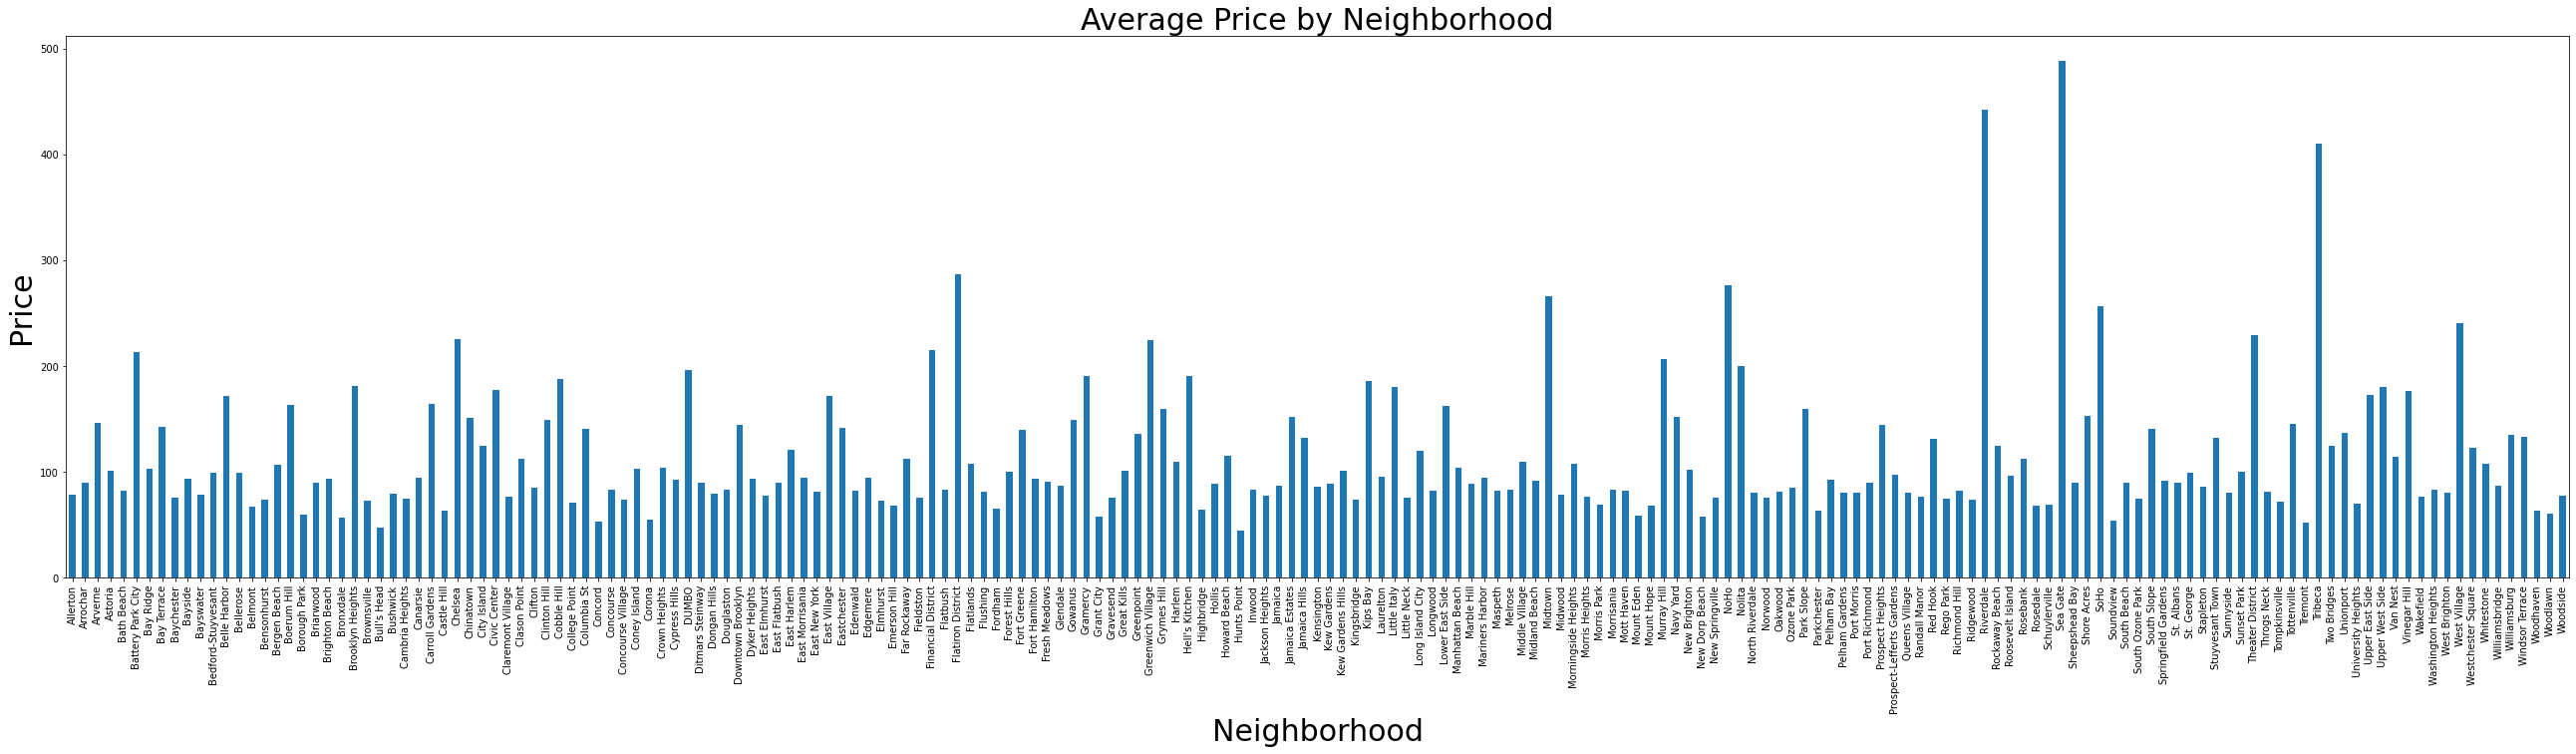

In [97]:
#######################################   Part2B      ##################################################
plt.figure(figsize=(45, 10))# size of the graph

neighbourhoodMeans.plot.bar() #plotting a bar graph
plt.title('Average Price by Neighborhood',fontsize=30)
plt.xlabel('Neighborhood',fontsize=30)

plt.ylabel('Price',fontsize=30)
plt.show()

From the heat map we can see the Most positive correlation is between host listing and availibilty(.23).
The most negative correlation is between price and minimum_nights: 0.022990171867882814



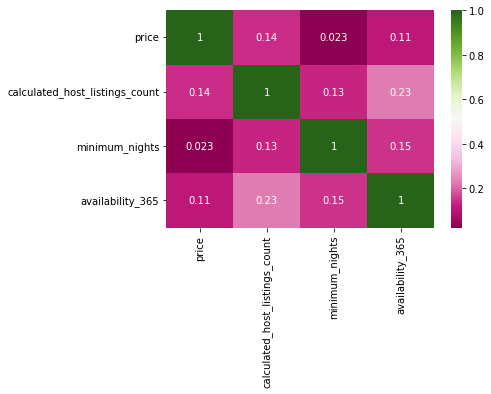

In [117]:
#######################################   Part3      ##################################################

part3 =['price', 'calculated_host_listings_count','minimum_nights','availability_365']#set of the most interesting features
Features = Part2a[part3]#part2a is the file from previous part
Matrix = Features.corr()#Does the pairwise Pearson correlation analysis

sb.heatmap(Matrix, annot=True, cmap='PiYG')#picked the color piyg as it seems to be the most appealing


print('From the heat map we can see the Most positive correlation is between host listing and availibilty(.23).')
print('The most negative correlation is between price and minimum_nights: 0.022990171867882814')
print()

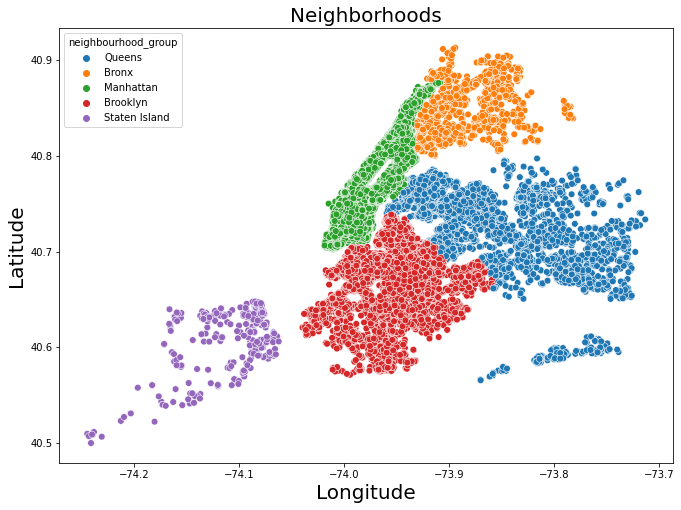

In [118]:
#######################################   Part4a      ##################################################
parameters = CleanData[['latitude', 'longitude', 'neighbourhood_group']]#inserting the data 
plt.figure(figsize=(11, 8))#size of the plot
sb.scatterplot(data=parameters, x='longitude', y='latitude', hue='neighbourhood_group', s=45, alpha=1)#seems like s=45,alpha=1 are the best options
plt.xlabel('Longitude',fontsize=20)
plt.ylabel('Latitude',fontsize=20)
plt.title('Neighborhoods',fontsize=20)
plt.show()

# the plot looks like the maps of the borough meaning it is right

<ipython-input-120-7ca7310ffd02>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Price4b['prices'] = pd.cut(Price4b['price'], bins=range(0, 1200, 200))# taking price ranges icrements of 200


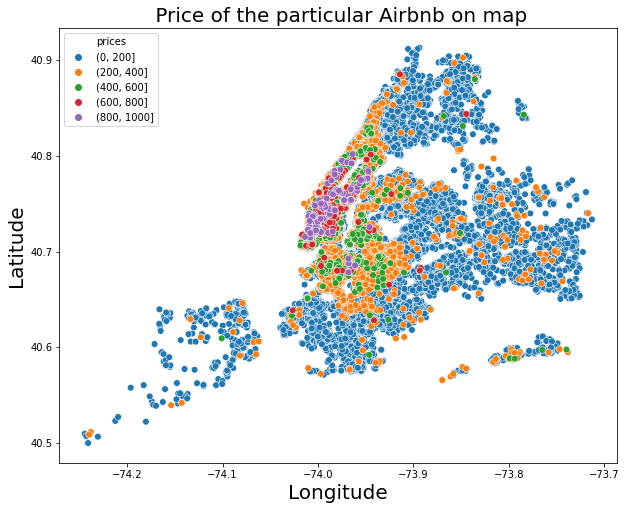

In [120]:
#######################################   Part4b      ##################################################
Price4b = CleanData[CleanData['price'] <= 1000]#only takes to account the prices below 1000
Price4b['prices'] = pd.cut(Price4b['price'], bins=range(0, 1200, 200))# taking price ranges icrements of 200
plt.figure(figsize=(10, 8))#plot size
sb.scatterplot(data=Price4b, x='longitude', y='latitude', hue='prices', s=45, alpha=1)#making a scatterplot with following parameters
plt.xlabel('Longitude',fontsize=20)#labeling the x axis
plt.ylabel('Latitude',fontsize=20)#labeling the y axis
plt.title(' Price of the particular Airbnb on map',fontsize=20)#labeling the title
plt.show()

# From the scatterplot we can see the most expensive borough is clearly Manhattan.

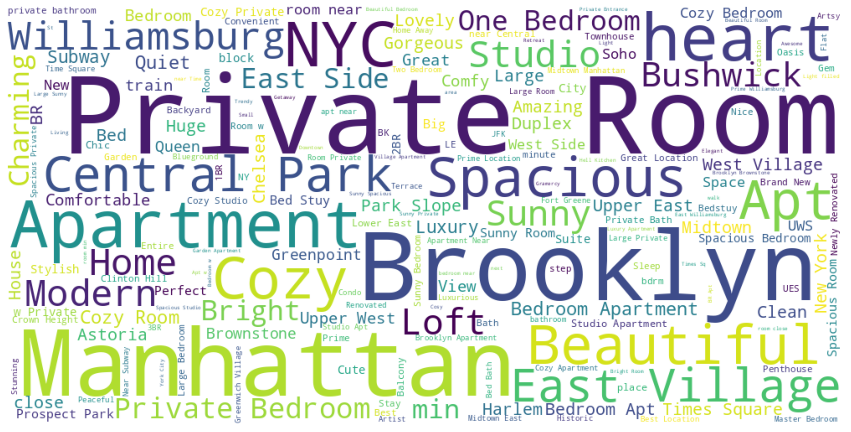

In [121]:
#######################################   Part5      ##################################################
CleanData['name'] = CleanData['name'].astype(str)#making every name into string
listname = CleanData['name'].tolist()# putting the names into list
stringname = ' '.join(listname)# make a string of names serperated by spaces
wordcloud = WordCloud(background_color='white', width=1000, height=500).generate(stringname)#using the wordCloud library we can print the workcloud
plt.figure(figsize=(15, 11))
plt.imshow(wordcloud)#nearest
plt.axis('off')#we dont need a axis in this scenario
plt.show()

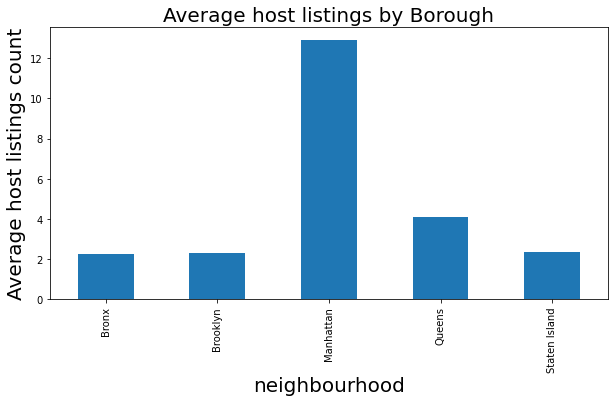

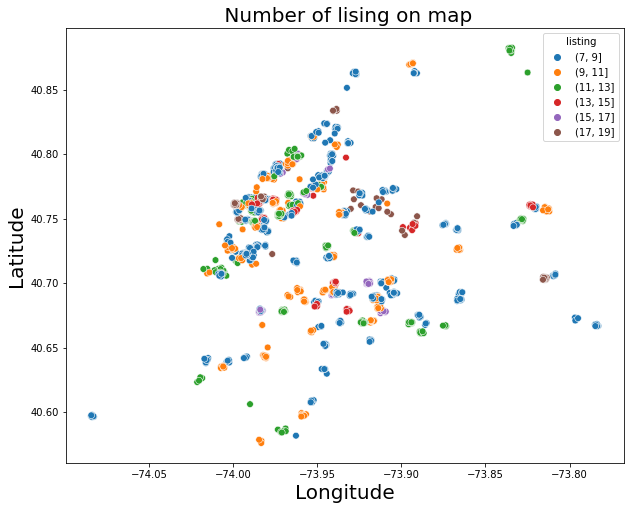

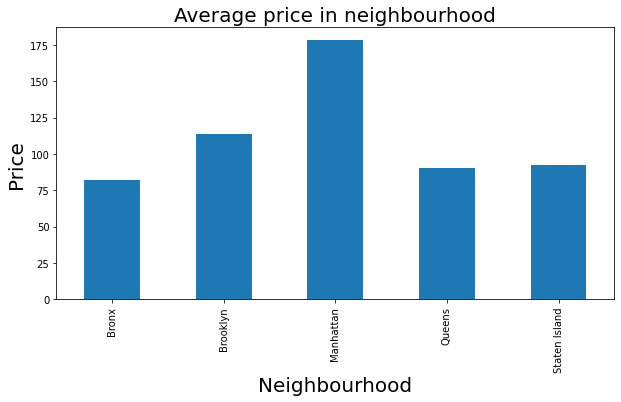

<ipython-input-138-55b79f8a8832>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Price4b['prices'] = pd.cut(Price4b['price'], bins=range(500, 1200, 200))# taking price ranges icrements of 200


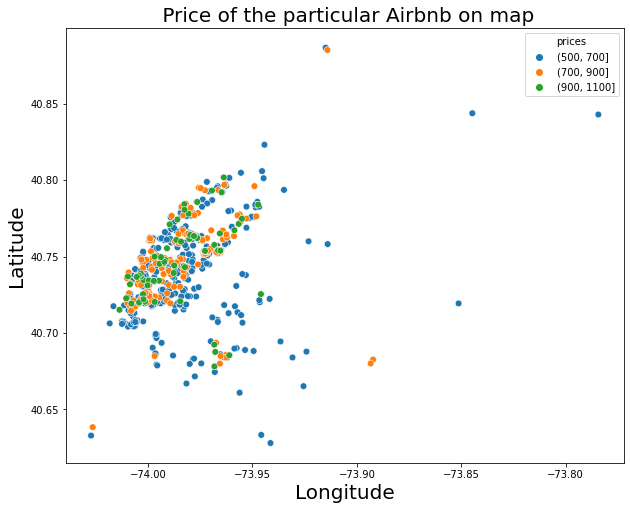

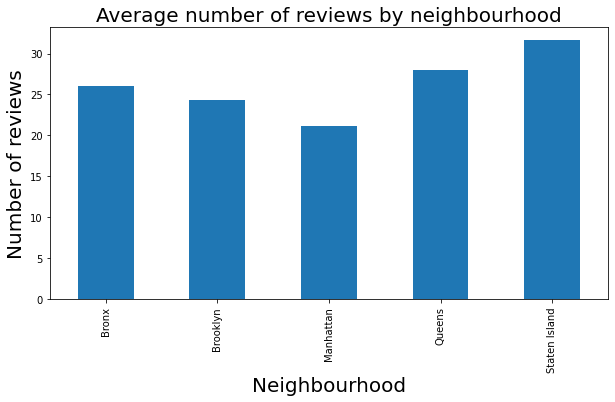

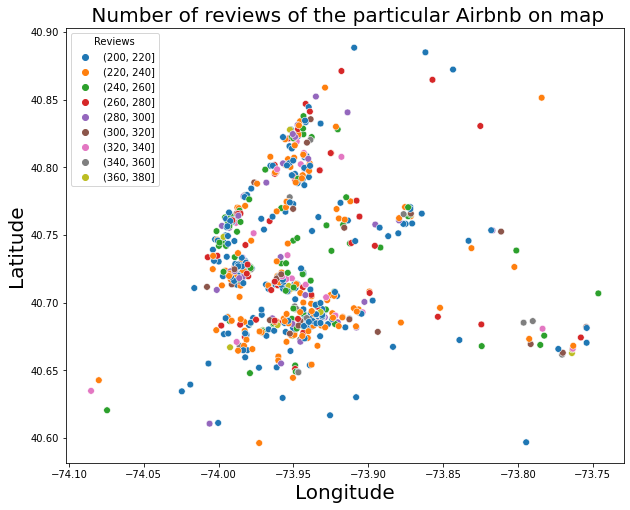

In [138]:
#######################################   Part6      ##################################################
# For part 6 I will be using scatter plot and will be using the higher percenatge of data for all plots as I belive there should be a direct relationship between number 
# of listing and price,reviews.

Busiest = CleanData.groupby('neighbourhood_group')['calculated_host_listings_count'].mean()# Calculate the mean of each neighbourhood
plt.figure(figsize=(10,5))
Busiest.plot.bar()
plt.title('Average host listings by Borough',fontsize=20)
plt.xlabel('neighbourhood',fontsize=20)
plt.ylabel('Average host listings count',fontsize=20)
plt.show()

listings = CleanData
listings['listing'] = pd.cut(listings['calculated_host_listings_count'], bins=range(7, 20, 2))
plt.figure(figsize=(10, 8))#plot size
sb.scatterplot(data=listings, x='longitude', y='latitude', hue='listing', s=45, alpha=1)#making a scatterplot with following parameters
plt.xlabel('Longitude',fontsize=20)#labeling the x axis
plt.ylabel('Latitude',fontsize=20)#labeling the y axis
plt.title(' Number of lising on map',fontsize=20)#labeling the title
plt.show()

priceOfneighbourhood = CleanData.groupby('neighbourhood_group')['price'].mean()# Calculate the mean of each neighbourhood
plt.figure(figsize=(10,5))
priceOfneighbourhood.plot.bar()
plt.title('Average price in neighbourhood',fontsize=20)
plt.xlabel('Neighbourhood',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.show()


Price4b['prices'] = pd.cut(Price4b['price'], bins=range(500, 1200, 200))# taking price ranges icrements of 200
plt.figure(figsize=(10, 8))#plot size
sb.scatterplot(data=Price4b, x='longitude', y='latitude', hue='prices', s=45, alpha=1)#making a scatterplot with following parameters
plt.xlabel('Longitude',fontsize=20)#labeling the x axis
plt.ylabel('Latitude',fontsize=20)#labeling the y axis
plt.title(' Price of the particular Airbnb on map',fontsize=20)#labeling the title
plt.show()





reviewsOfneighbourhood = CleanData.groupby('neighbourhood_group')['number_of_reviews'].mean()# Calculate the mean of each neighbourhood
plt.figure(figsize=(10,5))
reviewsOfneighbourhood.plot.bar()
plt.title('Average number of reviews by neighbourhood',fontsize=20)
plt.xlabel('Neighbourhood',fontsize=20)
plt.ylabel('Number of reviews',fontsize=20)
plt.show()

Reviews = CleanData

Reviews['Reviews'] = pd.cut(Reviews['number_of_reviews'], bins=range(200, 400, 20))# taking price ranges icrements of 200
plt.figure(figsize=(10, 8))#plot size
sb.scatterplot(data=Reviews, x='longitude', y='latitude', hue='Reviews', s=45, alpha=1)#making a scatterplot with following parameters
plt.xlabel('Longitude',fontsize=20)#labeling the x axis
plt.ylabel('Latitude',fontsize=20)#labeling the y axis
plt.title(' Number of reviews of the particular Airbnb on map',fontsize=20)#labeling the title
plt.show()

######################################################## Conclusion ############################################################



# It seems like price and reviews is related to busiest host as can be seen when making a scatter plot based on price, host listing and reviews. We see that
# wherever the price of listing is high on the map, there also seems to have higher number of host listing.Same is true for reviews and listing
# This makes sense because places that are the busiest will have the highest price and will also have more listing in the area as it attracts business.
# Same is true for reviews as more 


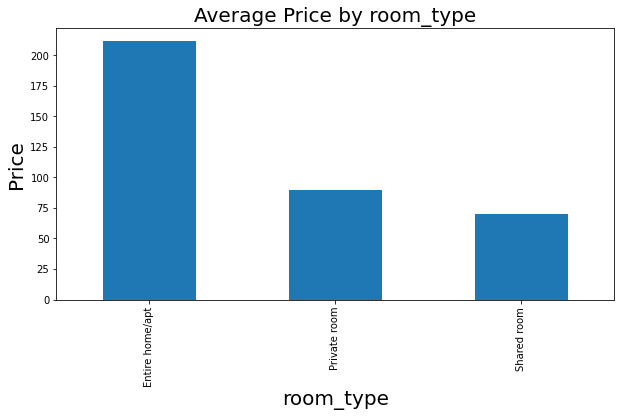

In [60]:
#######################################   Part7A      ##################################################

RoomTypeMeans = OrginalFile.groupby('room_type')['price'].mean()# Calculate the mean price of each room type.
plt.figure(figsize=(10,5))

RoomTypeMeans.plot.bar()
plt.title('Average Price by room_type',fontsize=20)
plt.xlabel('room_type',fontsize=20)
plt.ylabel('Price',fontsize=20)
plt.show()

# This shows that entire house has the highest average price, followed by private room and then shared room
# This was expected as more privacy and space will have higher price

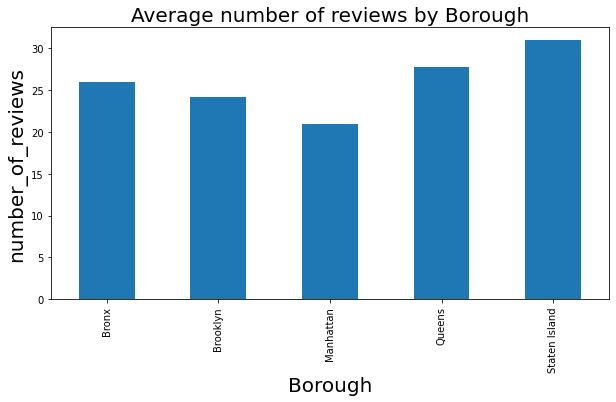

In [61]:
#######################################   Part7b     ##################################################

RoomTypeReviews = OrginalFile.groupby('neighbourhood_group')['number_of_reviews'].mean()# Calculate the mean of each neighbourhood
plt.figure(figsize=(10,5))

RoomTypeReviews.plot.bar()
plt.title('Average number of reviews by Borough',fontsize=20)
plt.xlabel('Borough',fontsize=20)
plt.ylabel('number_of_reviews',fontsize=20)
plt.show()

# I was expecting Manhattan to have the most number of reviews becuase it seemed like it would be the buisiest due to tourists.
# I was not expecting Staten island to have the most review
# It is fair to say that each bourugh is close in number of reviews.